<a href="https://colab.research.google.com/github/in-seixas/in-seixas_data_science-/blob/master/Analisando_os_Dados_do_Airbnb_(Amsterdam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Data Science**



### Análise dos Dados do Airbnb - Amsterdam

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Amsterdam e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img  width='35%' src='https://image.freepik.com/vetores-gratis/cidade-letras-conceito-de-amesterdao_23-2148394009.jpg'></center>





#Pergunta a ser respondida
Quais bairros são mais requisitados em Amsterdam? 
Quais bairros são mais caros para ficar em Amsterdam?


##Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Amsterdam (good for visualisations).*

##Importando Bibliotecas

In [274]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import plotly.express as px

%matplotlib inline


In [146]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-12-12/visualisations/listings.csv")

##Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**



*   **id** - *número de id gerado para identificar o imóvel*
*  **name** - *nome da propriedade anunciada*
*   **host_id** - *número de id do proprietário (anfitrião) da propriedade*
*   **host_name** - *Nome do anfitrião*
*   **neighbourhood_group** - *esta coluna não contém nenhum valor válido*
*   **neighbourhood** - *nome do bairro*
*   **latitude** - *coordenada da latitude da propriedade*
*   **longitude** - *coordenada da longitude da propriedade*
*   **room_type** - *informa o tipo de quarto que é oferecido*
*   **price** - *preço para alugar o imóvel*
*   **minimum_nights** - *quantidade mínima de noites para reservar*
*   **number_of_reviews** - *número de reviews que a propriedade possui*
*   **last_review** - *data do último review*
*   **reviews_per_month** - *quantidade de reviews por mês*
*   **calculated_host_listings_count** -* quantidade de imóveis do mesmo  anfitrião*
*   **availability_365** - *número de dias de disponibilidade dentro de 365 dias*





In [163]:
#mostrar as  primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.95,1,123
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,236,1,339,2020-04-09,2.58,2,3
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.14,1,33
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,219,2020-07-25,2.01,1,219
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.68,2,346


In [164]:
# identificar o volume de dados do DataFrame
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}\n'.format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	18522
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##Qual a percentagem de valores ausentes no dataset?

In [165]:

#É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
#As variáveis reviews_per_month e last_review possuem valores nulos em quase metade das linhas.
#As variáveis name e host_name têm aproximadamente 0,1% dos valores nulos.


#Ordenar em ordem descrescente as variáveis por seus valores faltantes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.128226
last_review                       0.128226
host_name                         0.002969
name                              0.001782
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

##Qual a distribuição dos dados?

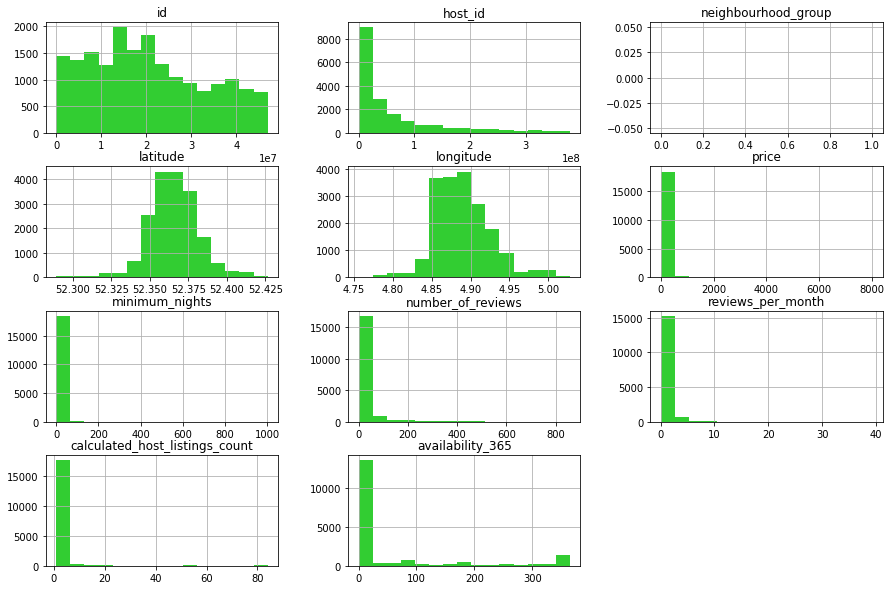

In [307]:
df.hist(bins = 15, figsize=(15,10), color = 'limegreen');

## Há outliers presentes?
Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [167]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18522.000000,18522.000000,18522.000000,16147.000000,18522.000000,18522.000000
mean,153.998218,3.597074,24.411133,0.637445,2.591189,56.578501
std,149.124299,14.194230,54.648059,1.159044,8.574458,111.719419
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,94.000000,2.000000,2.000000,0.130000,1.000000,0.000000
50%,128.000000,2.000000,8.000000,0.300000,1.000000,0.000000
75%,180.000000,3.000000,22.000000,0.620000,1.000000,45.000000
max,8000.000000,1001.000000,858.000000,39.310000,84.000000,365.000000


* É possível observar que a variável `price` apresenta 75% dos valores abaixo de  180. Porém seu valor máximo chega em 8000

* É possível observar também que a variável `minimum_nights` apresenta valor mínimo superior a 365 dias no ano. 


#### Boxplot para minimum_nights




minimum_nights: valores acima de 5:
1363 entradas
7.3588%


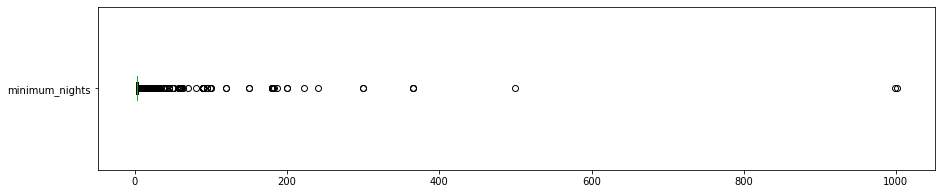

In [168]:
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3));

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 5:")
print("{} entradas".format(len(df[df.minimum_nights > 5])))
print("{:.4f}%".format((len(df[df.minimum_nights > 5]) / df.shape[0])*100))

## Boxplot para price

price: valores acima de 1000:
30 entradas
0.1620%


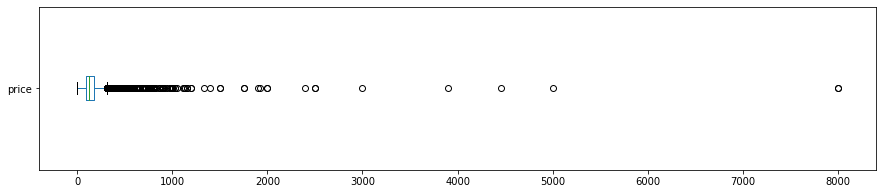

In [180]:
df.price.plot(kind = 'box', vert = False, figsize = (15,3));

# ver quantidade de valores acima de 30 dias para minimum_nights
print("price: valores acima de 1000:")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma

In [259]:
#A variável price apresenta-se com preço igual a zero
#Dessa forma, vamos remover o preço = 0
df['price'].sort_values(ascending=True)[0:20]

17625     0
17432     0
18222     0
17594     0
17606     0
17607     0
17434     0
17612     0
18260     0
17622     0
17623     0
17642     0
18353     0
18394     0
17613     0
17435     0
3050      5
12121     9
13233    12
17058    15
Name: price, dtype: int64

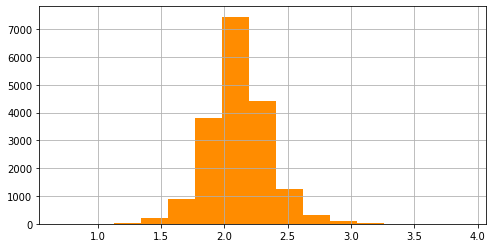

In [314]:
# remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean['price'] = np.log10(df_clean[df_clean['price'] != 0].price)
df_clean['minimum_nights'] = np.log10(df_clean[df_clean['minimum_nights'] != 0].minimum_nights)

#Histograma dos preços dos imoóveis no formato log10
df_clean['price'].hist(bins = 15, color = 'darkorange', figsize =(8,4));



Como observado, na variável `price` na base log10 diz que a média de preço apresenta-se com dois dígitos, alguns outros com apenas 1 e poucos com 3 dígitos. 

### **Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [241]:
#Criar correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.099853,-0.170987,-0.236740,0.078098,0.023658
minimum_nights,0.099853,1.000000,-0.099981,-0.178074,-0.042241,-0.029029
number_of_reviews,-0.170987,-0.099981,1.000000,0.780149,-0.025231,0.222760
reviews_per_month,-0.236740,-0.178074,0.780149,1.000000,-0.003022,0.256564
calculated_host_listings_count,0.078098,-0.042241,-0.025231,-0.003022,1.000000,0.011213
availability_365,0.023658,-0.029029,0.222760,0.256564,0.011213,1.000000


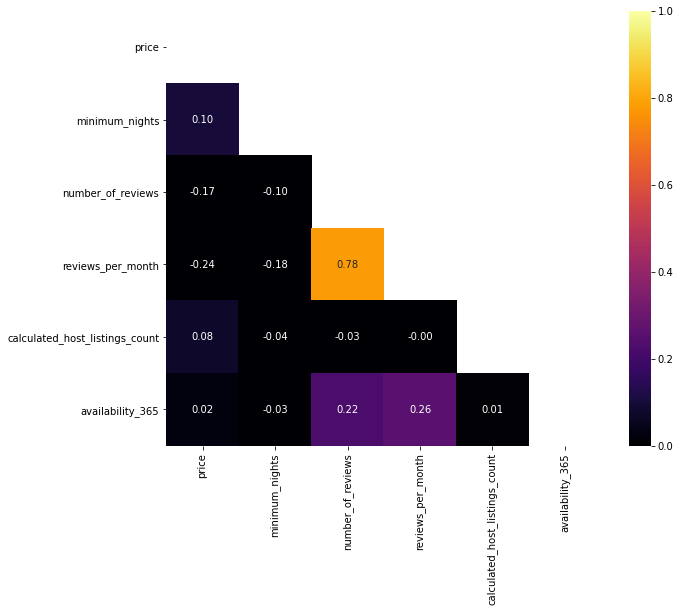

In [242]:
#Criar Heatmap
#É possível observar que existem poucas correlações significativas entre as variáveis, exceto para number_of_reviews e reviews_per_month

plt.figure(figsize=(10,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin= 0, vmax=1, cmap='inferno', fmt='.2f', mask=mask, square=True, annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [183]:
## mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    13216
Private room        3735
Hotel room           139
Shared room           50
Name: room_type, dtype: int64

In [184]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()/df_clean.shape[0]

Entire home/apt    0.771062
Private room       0.217911
Hotel room         0.008110
Shared room        0.002917
Name: room_type, dtype: float64

### **Qual a localidade mais cara de Amsterdam sedundo o Airbnb?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [265]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-Oost                2.166813
Centrum-West                2.164024
Zuid                        2.160337
IJburg - Zeeburgereiland    2.146800
De Pijp - Rivierenbuurt     2.143600
Westerpark                  2.119917
Oud-Oost                    2.118800
De Baarsjes - Oud-West      2.113917
Oud-Noord                   2.100368
Watergraafsmeer             2.100234
Name: price, dtype: float64



```
# Isto está formatado como código
```

Vejamos que as **05** primeiras localidades apresentam valores bem próximos. Mas observando mais afundo, será que existe uma **diferença na quantidade** de imóvel em cada um desses bairros?

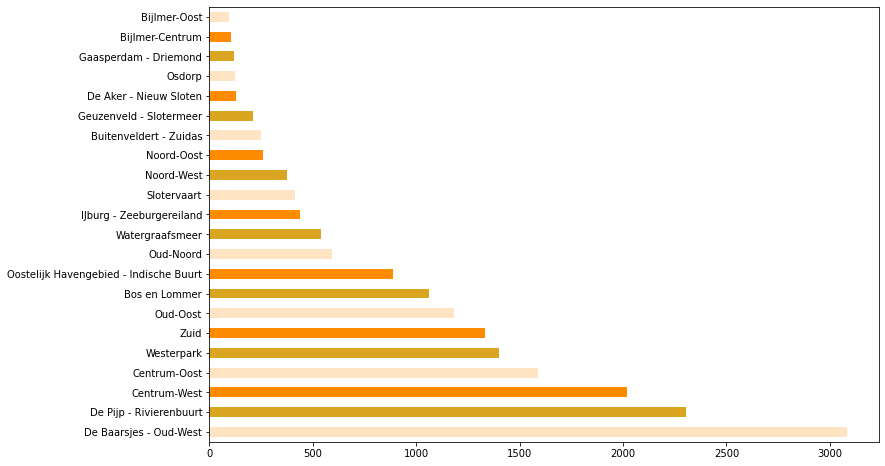

In [305]:

df_clean['neighbourhood'].value_counts().sort_values(ascending=False).plot(kind='barh', figsize=(12,8), color = {'bisque', 'goldenrod', 'darkorange'});

Dessa forma, podemos observar que os bairros `Zuid`,`Centrum-West` ,`Centrum-Oost`, `Oud-Oost` e `IJburg - Zeeburgereiland` estão no topo dos bairros com maior valor de imóvel em Amsterdam.



------------------------------------

*Como* são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.


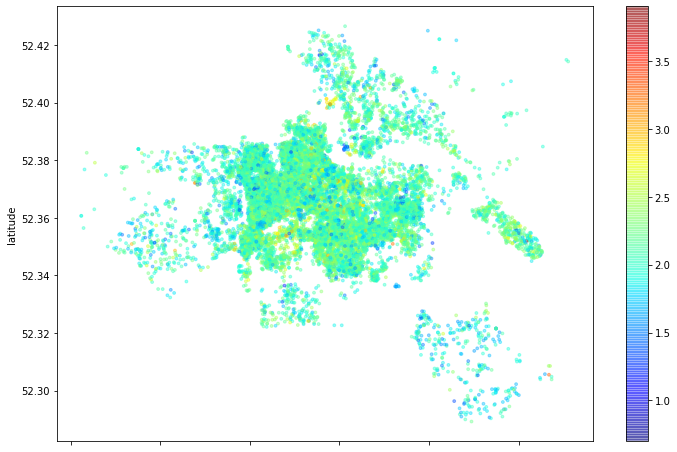

In [245]:

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [263]:
 
fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", hover_name= df_clean['neighbourhood'],
                        color_discrete_sequence=["fuchsia"], zoom=25, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há uma diferença na quantidade de imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.